In [1]:
!pip install IPython 
from IPython.display import Image

# 분류(Classification) 실습: 타이타닉 생존 여부를 예측하는 이진 분류 모델 만들기 프로젝트
![titanic](titanic.jpg)
~~~
타이타닉(Titanic)은 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선이다. 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰하였다. 배에는 승객들을 태울 충분한 구명보트가 없었고, 타이타닉의 침몰로 2,224명의 승객 중 1,502명이 사망하였다.
~~~
타이타닉 데이터셋은 가장 유명한 데이터셋 중 하나입니다. <타이타닉에서 살아남을 수 있는 승객 예측하기>라는 문제를 풀기 위해 여러 접근 방식이 시도되었습니다. 오늘은 "분류" 모델을 사용하여 타이타닉 생존 여부를 예측하는 모델을 만들어 볼 것입니다.

## 목표
📌 어떤 사람에 대한 정보가 주어졌을 때, **사람이 타이타닉에서 생존할 것인지, 생존하지 못할 것인지 예측하는 모델**만들어봅시다.
- 주어지는 정보: 좌석 등급, 성별, 나이 등의 정보 (모델의 독립 변수)
- 예측하고자 하는 정보: 생존 여부 (모델의 종속 변수)
<br>
<br>
## 모델의 종류
: 예측하고자 하는 값인 '생존 여부'가 참/거짓으로 구분되기 때문에, **이진 분류** 모델을 사용합니다.
- 로지스틱 회귀
- 의사결정 나무
- 서포트벡터머신(SVM)
- kNN
<br>
<br>
## 진행 과정
1. 데이터 읽기 및 전처리
    1) 데이터 불러오기
    2) 결측치 처리
    3) 불필요한 변수 drop
    4) 피처 엔지니어링
<br>
<br>
2. 이진 분류 모델 target과 feature 정의
<br>
<br>
3. 모델 생성
    1) 로지스틱 회귀
    2) 의사결정 나무
    3) 서포트벡터머신(SVM)
    4) kNN

# 데이터 읽기 및 전처리 
1) 데이터 불러오기
2) 결측치 처리
3) 불필요한 변수 drop
4) 피처 엔지니어링

In [2]:
# 라이브러리 설치
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


## 데이터 불러오기
[ 참고 ]
1. 라이브러리를 별칭으로 import 해오기
~~~
import [라이브러리 이름] as [별칭]
~~~
2. csv 파일 읽어오기(pandas 함수)
~~~
read_csv("파일 경로")
~~~
3. 요약된 정보 확인하기
~~~
info()
~~~

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [3]:
# seaborn을 sns라는 별칭으로, pandas를 pd라는 별칭으로 import 해 오세요.

import seaborn as sns
import pandas as pd

# df라는 변수에, titanic.csv 파일을 읽어와서 저장하세요.

df = pd.read_csv("./titanic.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# df의 요약된 정보를 확인하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


데이터프레임의 각 변수에 대한 설명은 아래와 같습니다.

[ 변수 설명 ]

- PassengerId : 각 승객의 고유 번호

- Survived : 생존 여부(종속 변수)

        0 = 사망
        1 = 생존
 
- Pclass : 객실 등급 - 승객의 사회적, 경제적 지위

        1st = Upper
        2nd = Middle
        3rd = Lower

- Name : 이름

- Sex : 성별

- Age : 나이

- SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

- Parch : 동반한 Parent(부모) Child(자식)의 수

- Ticket : 티켓의 고유넘버

- Fare : 티켓의 요금

- Cabin : 객실 번호

- Embarked : 승선한 항


## 결측치 처리
[ 참고 ]

1. 컬럼별 결측치의 수 확인
~~~
isnull().sum()
~~~

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [6]:
# 데이터프레임 df의 컬럼별 결측치의 수를 확인하세요.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age에서 177개의 결측치를 확인할 수 있습니다. 이 결측치를 **Name에 들어있는 정보**를 이용해서 채워줄 겁니다.

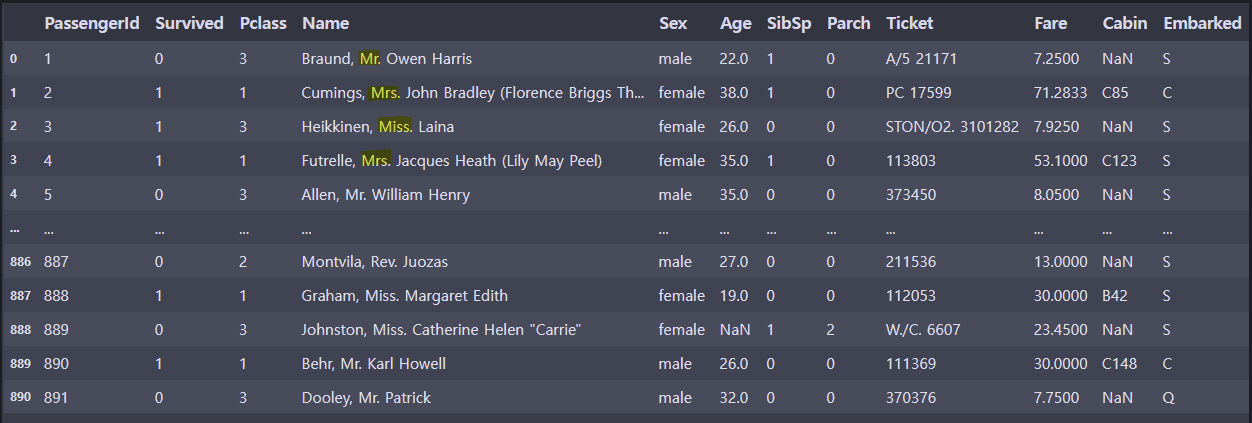

Name 컬럼에는 위와 같이 나이를 유추할 수 있는 호칭이 포함되어 있습니다. 이 호칭을 이용해 Age의 결측값을 채우는 과정은 다음과 같습니다.
1. initial 컬럼을 만들어 호칭(Mr, Miss 등)을 넣는다.
2. 호칭이 매우 다양하기 때문에, Mr, Mrs, Miss, Master, Other로 통일한다.
3. 결측값을 initial별 평균으로 대체한다.

아래는 그 과정입니다.

In [7]:
## 1. initial 컬럼을 만들어 호칭(Mr, Miss 등)을 넣는다.

df['Initial'] = 0 # initial 컬럼을 만들고 일시적으로 값을 0으로 초기화

for index, row in df.iterrows():
    initial_search = row['Name'].split(',')[1].split('.')[0].strip() # Name 컬럼에서 .(dot)을 기준으로 알파벳 문자열 추출
    df.at[index, 'Initial'] = initial_search

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [8]:
## 2. 호칭이 매우 다양하기 때문에, Mr, Mrs, Miss, Master, Other로 통일한다.

# 유추 가능한 값들로 대체하고, 흔하지 않은 Initial들은 Other로 대체

df['Initial'].replace(
    [
        'Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
        'Rev', 'Capt', 'Sir', 'Don','the Countess' 
    ], 
    [
        'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other',
        'Other', 'Mr', 'Mr', 'Mr', 'Other'
    ],
    inplace=True)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [9]:
# 3. 결측값을 initial별 평균으로 대체한다.

df.loc[(df.Age.isnull()) & (df.Initial == 'Mr'), 'Age'] = 33
df.loc[(df.Age.isnull()) & (df.Initial == 'Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull()) & (df.Initial == 'Master'), 'Age'] = 5
df.loc[(df.Age.isnull()) & (df.Initial == 'Miss'), 'Age'] = 22
df.loc[(df.Age.isnull()) & (df.Initial == 'Other'), 'Age'] = 46

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

Age 컬럼의 결측값이 0이된 것을 확인할 수 있습니다.

## 불필요한 변수 Drop
1. 'Embarked' 컬럼의 결측치는 단 2개만 존재하므로, 결측치가 존재하는 행을 제거합니다.
2. 'Cabin','Name','PassengerId','Ticket' 컬럼은 생존 여부와 크게 관련 없는 것으로 보이므로, 모두 제거합니다.

[ 참고 ]
1. 결측치 행 제거
~~~
dropna(subset=['결측치를 제거하고자 하는 컬럼 명'], inplace=True/False)
- inplace=True: 원본 데이터프레임이 직접 수정
- inplace=False: 원본 데이터를 수정하지 않고 새로운 데이터프레임을 반환
~~~
2. 컬럼 drop
~~~
df.drop(['제거하고자 하는 컬럼 명'], axis=0/1, inplace=True/False)
- inplace=True: 원본 데이터프레임이 직접 수정
- inplace=False: 원본 데이터를 수정하지 않고 새로운 데이터프레임을 반환
- axis=0: 행 제거
- axis=1: 열 제거
~~~

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [11]:
# 1. 'Embarked' 컬럼에서 결측치가 있는 행을 제거하세요.inplace는 True로 합니다.
df.dropna(subset=['Embarked'], inplace=True)

# 2. 'Cabin','Name','PassengerId','Ticket' 컬럼을 제거하세요. inplace는 True로 합니다.
df.drop(['Cabin','Name','PassengerId','Ticket'], axis=1, inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Initial     0
dtype: int64

모든 결측치가 처리되었음을 확인할 수 있습니다.

In [13]:
# 나중에 사용하기 위해 원본 데이터프레임을 저장해둡니다.
df_org = df.copy()

## 피처 엔지니어링
모델이 이해하기 좋은 방식으로 변수를 가공합니다.
- **Sex**  male : 0, female : 1
- **Age** 나이대 (예: 23세 -> 2)
- **Fare** 9분위 label
- **Embarked** S : 1, C : 2, Q : 3
- **Initial** Mr : 0, Miss : 1, Mrs : 2, Master : 3, Other :4
- **Relatives** : SibSp + Parch

In [14]:
# Sex 열의 값을 male -> 0, female -> 1로 전환합니다. 
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Age 열을 10년 단위로 나누어 구간화합니다.
df['Age'] = (df['Age'] // 10).astype(int)

# Fare 열을 9분위로 구간화합니다.
df['Fare'] = pd.qcut(df['Fare'], q=9, labels=range(9))

# Embarked 열의 값을 숫자로 전환합니다.
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

# Initial 열을 숫자로 전환합니다.
initial_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other':4}
df['Initial'] = df['Initial'].map(initial_mapping)

df['Relatives'] = df["SibSp"] + df["Parch"]

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Relatives
0,0,3,0,2,1,0,0,1,0,1
1,1,1,1,3,1,0,7,2,2,1
2,1,3,1,2,0,0,2,1,1,0
3,1,1,1,3,1,0,7,1,2,1
4,0,3,0,3,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,2,0,0,3,1,4,0
887,1,1,1,1,0,0,6,1,1,0
888,0,3,1,2,1,2,5,1,1,3
889,1,1,0,2,0,0,6,2,0,0


# 이진 분류 모델 target과 feature 정의
앞서 말했지만, 우리의 목표는 어떤 사람의 정보가 주어졌을 때 그 사람의 생존 여부를 예측하는 것입니다. 따라서 모델의 target과 feature는 다음과 같습니다.
- feature(예측을 위해 주어지는 정보 = 독립 변수): 한 사람에 대한 정보 = Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Initial, Relatives
- target(예측하고자 하는 값 = 종속 변수): Survived

이 target과 feature에 따라 생존 여부를 예측하는 함수 predict_survival를 정의합니다.
- 함수의 input: model, scaler, 독립 변수(pclass, sex, age, sibsp, parch, fare, embarked, initial)
- 함수의 output: 생존 여부, 확률

In [15]:
# predict_survival 함수 정의
def predict_survival(model, scaler, pclass, sex, age, sibsp, parch, fare, embarked, initial):
    # 입력된 데이터를 데이터프레임으로 변환합니다.
    # 위에서 피처엔지니어링한 방식대로(모델의 input으로 적절하게) input 값을 변환해줍니다. 
    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [0 if sex == 'male' else 1],  # 성별을 인코딩합니다.
        'Age': [age // 10],  # 나이를 10년 단위로 나눕니다.
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],  # 요금을 일단 그대로 둡니다.
        'Embarked': [1 if embarked == 'S' else (2 if embarked == 'C' else 3)],  # 승선한 항구를 인코딩합니다.
        'Initial': [0 if initial == 'Mr' else (1 if initial == 'Miss' else (2 if initial == 'Mrs' else (3 if initial == 'Master' else 4)))],  # 호칭을 인코딩합니다.
        'Relatives': [sibsp + parch],
    })

    # 'Fare' 값을 qcut으로 생성된 bins를 사용해 범주화합니다.
    fare_bins = pd.qcut(df_org['Fare'], 9, retbins=True)[1]  # pd.qcut을 사용해 요금 구간을 얻습니다.
    input_data['Fare'] = pd.cut(input_data['Fare'], bins=fare_bins, labels=False, include_lowest=True)

    # 입력 데이터를 스케일링합니다.
    input_data_scaled = scaler.transform(input_data)
    
    # 예측을 수행합니다.
    prediction = model.predict(input_data_scaled)
    prediction_proba = model.predict_proba(input_data_scaled)

    # 예측 결과를 반환합니다.
    result = "Survived" if prediction == 1 else "Not Survived"
    probability = prediction_proba[0][int(prediction)]  # 예측된 클래스의 확률을 반환합니다.
    
    return result, probability

이제 이 함수에 input으로 들어갈 model을 만들어봅시다!

# target과 feature 분리
데이터 셋을 target과 feature를 분리합니다.
예측하고자 하는 값인 target과 예측하기 위해 주어진 값인 feature를 각각 변수에 담습니다.

target = 종속 변수 (변수명=y): 'Survived'
feature = 독립 변수 (변수명=X): 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'Fare', `Embarked', 'Initial'

[ 참고 ]

drop() 함수는 drop한 후의 데이터프레임을 반환합니다.
drop('drop하고자 하는 열', axis=1)

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [16]:
# 변수 X에 feature(= 'Survived' 열을 drop한 데이터프레임)를 담습니다.
X = df.drop('Survived', axis=1) 

In [17]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Relatives
0,3,0,2,1,0,0,1,0,1
1,1,1,3,1,0,7,2,2,1
2,3,1,2,0,0,2,1,1,0
3,1,1,3,1,0,7,1,2,1
4,3,0,3,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...
886,2,0,2,0,0,3,1,4,0
887,1,1,1,0,0,6,1,1,0
888,3,1,2,1,2,5,1,1,3
889,1,0,2,0,0,6,2,0,0


모델의 input이 되는 feature 데이터프레임입니다.

In [18]:
# 변수 y에 target(= 'Survived' 열)을 담습니다.
y = df['Survived']

In [19]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

모델의 output이 되는 target 데이터프레임입니다.

# 데이터 셋을 훈련 세트와 테스트 세트로 나누기
- 훈련 세트 -> 모델을 학습시키는 데 사용됩니다.
- 테스트 세트 -> 완성된 모델을 평가하는 데 사용됩니다.

독립변수(X)와 종속변수(y)를 모두 훈련 세트와 테스트 세트로 나누어봅시다.

[ 변수명 ]

- 독립변수 훈련 세트: X_train
- 독립변수 테스트 세트: X_test
- 종속변수 훈련 세트: y_train
- 종속변수 테스트 세트: y_test

[ 참고 ]

tran_test_split 함수는 변수를 훈련 세트와 테스트 세트로 나누어 반환합니다.
~~~
train_test_split(독립변수, 종속변수, test_size=테스트 세트 크기, random_state=시드값)
~~~
-> 독립변수 훈련 세트, 독립변수 테스트 세트, 종속변수 훈련 세트, 종속변수 테스트 세트 반환

- test_size: 테스트 세트의 크기를 결정합니다. 예를 들어, 훈련 세트와 테스트 세트를 각각 70%와 30%로 하고 싶으면, test_size=0.3으로 하면 됩니다.
- random_state: 임의의 숫자로 설정된 시드로, 어떤 숫자를 사용해도 상관없습니다.

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [1]:
# sklearn.model_selectio의 train_test_split 함수를 import 해주세요.
from sklearn.model_selection import train_test_split

# tran_test_split 함수를 이용하여 독립변수(X)와 종속변수(y)를 각각 훈련 세트와 테스트 세트로 나누어주세요. 각 훈련 세트와 테스트 세트의 변수 명은 아래와 같습니다.
# 독립변수 훈련 세트: X_train, 독립변수 테스트 세트: X_test, 종속변수 훈련 세트: y_train, 종속변수 테스트 세트: y_test
# 단, random_state는 42로 합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

독립변수의 훈련 세트와 테스트 세트의 개수를 확인해봅시다.

In [41]:
print("len(X_train): ",len(X_train))
print("len(X_test): ",len(X_test))
print("len(X_test)/(len(X_train)+len(X_test))",len(X_test)/(len(X_train)+len(X_test)))

len(X_train):  622
len(X_test):  267
len(X_test)/(len(X_train)+len(X_test)) 0.30033745781777277


독립변수의 훈련 세트와 테스트 세트가 약 80%와 20% 비율로 나누어졌음을 확인할 수 있습니다.

# feature에 scaler 적용
MinMaxScaler를 이용해서 모든 feature(독립변수, X)를 스케일링 해줍니다. 

[ 변수명 ]
- 스케일링된 독립변수 훈련 세트: X_train_scaled
- 스케일링된 독립변수 테스트 세트: X_test_scaled

[ 참고 ]

1. MinMaxScaler 함수는 MinMaxScaler를 반환합니다.
~~~
MinMaxScaler()
~~~
2. fit_transform 함수는 훈련 데이터의 스케일링을 수행하고, 스케일링된 데이터를 반환합니다.
~~~
스케일러.fit_transform(훈련 데이터)
~~~
3. transform 함수는 테스트 데이터의 스케일링을 수행하고, 스케일링된 데이터를 반환합니다.
~~~
스케일러.transform(테스트 데이터)
~~~

cf) 훈련 데이터에 대해서는 fit과 transform을, 테스트 데이터에 대해서는 transform만을 수행합니다.

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [42]:
# sklearn.preprocessing에서 MinMaxScaler를 import 해옵니다.
from sklearn.preprocessing import MinMaxScaler

# scaler라는 변수를 MinMaxScaler 함수로 선언합니다.
scaler = MinMaxScaler()

# X_train_scaled라는 변수에 스케일링된 독립변수 훈련 세트를 저장합니다.
X_train_scaled = scaler.fit_transform(X_train)

# X_test_scaled라는 변수에 스케일링된 독립변수 테스트 세트를 저장합니다.
X_test_scaled = scaler.transform(X_test)

# 모델 생성 및 평가
위에서 만든 함수에 input으로 들어갈 model을 만듭니다. 총 4개의 이진 분류 모델을 만들어볼 것입니다.
1. 로지스틱 회귀
2. 의사 결정 나무
3. 서포트벡터머신(SVM)
4. kNN

또한, 생성한 모델들을 다음과 같은 방식으로 평가합니다.
1. 혼동 행렬
2. accuracy
3. 분류 보고서


## 로지스틱 회귀
로지스틱 회귀 이진 분류 모델을 생성합니다.
sklearn 라이브러리는 로지스틱 회귀 모델(LogisticRegression)을 제공합니다.

[ 참고 ]
로지스틱 회귀 모델 생성 함수
~~~
LogisticRegression()
~~~
위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

### 모델 생성

In [43]:
# sklearn.linear_model에서 LogisticRegression 함수를 import 해오세요.
from sklearn.linear_model import LogisticRegression

# lr_model을 변수명으로 해서 로지스틱회귀 모델 객체를 생성하세요.
lr_model = LogisticRegression()

### 훈련 세트로 모델 학습
[ 참고 ] fit 함수는 모델을 훈련시키는 데 사용됩니다.
~~~
모델.fit(독립변수 훈련 세트, 종속변수 훈련 세트)
~~~
-> 모델이 훈련 세트에 의해 훈련됩니다.

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [44]:
# lr_model 모델을 훈련 세트로 학습시키세요.
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

### 모델 평가
자, 이제 예측을 위한 로지스틱 회귀 모델이 준비되었습니다.

만든 모델이 얼마나 예측을 잘 수행하는지 확인해봅시다.

#### 테스트 세트에 대한 예측 결과 생성
먼저, 스케일링된 독립변수 테스트 세트에 대한 종속변수 예측값을 구해봅시다.

[ 참고 ]
predict: 예측 결과 생성 함수
~~~
모델.predict(독립변수 테스트 세트)
~~~

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [45]:
# y_pred라는 함수에 예측값을 저장합니다. 이때 스케일링된 독립변수 테스트 세트(X_test_scaled)를 사용합니다.
y_pred = lr_model.predict(X_test_scaled)

#### 예측 결과에 대한 모델 평가
실제 target 값(= 종속변수 테스트 세트 = y_test)과 예측한 target 값(= 종속 변수 예측값 = y_pred)를 비교하여 모델을 평가합니다.

다음 방식을 사용해서 모델을 평가합니다.
- 혼동 행렬
- accuracy
- 분류 보고서 생성

[ 참고 ]
1. confusion_matrix: 혼동 행렬 반환 함수
~~~
confusion_matrix(실제값, 예측값)
~~~
2. accuracy_score: 정확도 반환 함수
~~~
accuracy_score(실제값, 예측값)
~~~
3. classification_report:  precision, recall, f1-score, support 등 분류 모델에 대한 종합적인 평가 지표를 반환합니다.
~~~
classification_report(실제값, 예측값)
~~~

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

##### 혼동 행렬

In [46]:
# sklearn.metrics에서 confusion_matrix를 import 해옵니다.
from sklearn.metrics import confusion_matrix

# 실제 타겟(y_test)과 예측 타겟(y_pred)을 사용하여 혼동 행렬 생성해서, conf_matrix 변수에 저장해주세요.
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
print(conf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')

[[85 24]
 [14 55]]
True Negatives: 85
False Positives: 24
False Negatives: 14
True Positives: 55


##### 정확도

In [28]:
# sklearn.metrics에서 accuracy_score를 import 해오세요.
from sklearn.metrics import accuracy_score

# accuracy 변수에 정확도를 저장해주세요.
accuracy = accuracy_score(y_test, y_pred)

In [29]:
print(f'로지스틱회귀 모델의 정확도: {accuracy}')

로지스틱회귀 모델의 정확도: 0.7865168539325843


만든 모델의 정확도는 0.7865168539325843입니다.

##### 분류 보고서

In [30]:
# sklearn.metrics에서 classification_report를 import 해오세요.
from sklearn.metrics import classification_report

# report 변수에 분류 보고서를 저장하세요.
report = classification_report(y_test, y_pred)

In [31]:
print(f'[ 분류 보고서 ]\n {report}')

[ 분류 보고서 ]
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       109
           1       0.70      0.80      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



생성한 로지스틱 회귀 모델에 대해서, classification_report: precision, recall, f1-score, support 등 종합적인 평가 지표를 확인할 수 있습니다.

### 생성한 모델 사용해보기
2번에서 행성했던 predict_survival 함수를 사용하여 예측값과 확률을 구합니다.

아래는 어떤 사람에 대한 정보입니다. 생성한 lr 모델을 이용해서 이 사람이 생존할지 생존하지 못할지, 또 그 예측이 맞을 확률은 어느 정도인지 구하세요.

[ 정보 ]
- pclass: 2
- sex: 'female'
- age: 32 
- sibsp: 1
- parch: 2 
- fare: 60
- embarked: 'C'
- initial: 'Mrs'

위의 정보를 참고하여 아래 주석에 맞게 코드를 작성해주세요.

In [32]:
model = lr_model
# predict_survival 함수를 이용해서 위에서 주어진 정보의 사람의 생존 여부와 확률을 구하세요.
# 예측한 생존 여부는 result 변수에, 확를은 probability 변수에 저장합니다. 

result, probability = predict_survival(
    model, scaler, 
    pclass=2, sex='female', age=32, 
    sibsp=1, parch=2, 
    fare=60, embarked='C', initial='Mrs'
)

In [33]:
result, probability

('Survived', 0.8259080513959017)

위에서 주어진 사람은 생존할 것으로 예측되고, 그 확률은 0.8259080513959017입니다.

## 의사 결정 나무
이번에는 의사 결정 나무 모델을 만들어보겠습니다. 다른 과정은 모두 똑같고, 로지스틱 회귀 모델 대신 의사 결정 나무 모델을 사용합니다.

sklearn 라이브러리는 의사 결정 나무 모델(DecisionTreeClassifier)을 제공합니다.

[ 참고 ]
의사 결정 나무 모델 생성 함수
~~~
DecisionTreeClassifier(random_state=시드값)
- random_state: 임의의 숫자로 설정된 시드로, 어떤 숫자를 사용해도 상관없습니다.
~~~

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [34]:
# sklearn.tree에서 DecisionTreeClassifier를 import 해오세요.
from sklearn.tree import DecisionTreeClassifier

# tree_model이라는 변수에 의사 결정 나무 모델을 생성해주세요. 단, random_state는 42로 합니다.
tree_model = DecisionTreeClassifier(random_state=42)

이후 나머지 과정은 모두 같습니다.

In [35]:
# 모델 학습
tree_model.fit(X_train_scaled, y_train)

# 예측 결과 생성
tree_pred = tree_model.predict(X_test_scaled)

# 혼동 행렬 생성
tn, fp, fn, tp = confusion_matrix(y_test, tree_pred).ravel()
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')

# 정확도 측정
tree_accuracy = accuracy_score(y_test, tree_pred)
print("Decision Tree 모델의 정확도:", tree_accuracy)

# 분류 보고서 생성
tree_report = classification_report(y_test, tree_pred)
print(tree_report)

# 생성한 모델로 예측값과 확률 도출
result, probability = predict_survival(
    tree_model, scaler, 
    pclass=2, sex='female', age=32, 
    sibsp=1, parch=2, 
    fare=60, embarked='C', initial='Mrs'
)

result, probability

True Negatives: 95
False Positives: 14
False Negatives: 20
True Positives: 49
Decision Tree 모델의 정확도: 0.8089887640449438
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       109
           1       0.78      0.71      0.74        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



('Survived', 1.0)

## 서포트 벡터 머신 (SVM)
서포트 벡터 머신 역시 같은 방식으로 모델을 만듭니다.
sklearn 라이브러리는 서포트 벡터 머신 분류기(SVC=Support Vector Classification)을 제공합니다.

[ 참고 ]
서포트 벡터 머신 모델 생성 함수
~~~
SVC(random_state=시드값, probability=True/False)
- random_state: 임의의 숫자로 설정된 시드로, 어떤 숫자를 사용해도 상관없습니다.
- probability: 모델이 클래스의 확률을 제공할 수 있도록 하는 옵션입니다.
~~~

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [36]:
# sklearn.svm에서 SVC를 import 해오세요.
from sklearn.svm import SVC

# svm_model 단, random_state는 42, probability=True로 합니다.
svm_model = SVC(random_state=42, probability=True)

이후 나머지 과정은 모두 같습니다.

In [37]:
# 모델 훈련
svm_model.fit(X_train_scaled, y_train)

# SVM 예측 결과 생성
svm_pred = svm_model.predict(X_test_scaled)

# 혼동 행렬 생성
tn, fp, fn, tp = confusion_matrix(y_test, svm_pred).ravel()
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')

# 정확도 측정
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM 모델의 정확도:", svm_accuracy)

# 분류 보고서 생성
svm_report = classification_report(y_test, svm_pred)
print(svm_report)

# 생성한 모델로 예측값과 확률 도출
result, probability = predict_survival(
    svm_model, scaler, 
    pclass=2, sex='female', age=32, 
    sibsp=1, parch=2, 
    fare=60, embarked='C', initial='Mrs'
)

result, probability

True Negatives: 95
False Positives: 14
False Negatives: 21
True Positives: 48
SVM 모델의 정확도: 0.8033707865168539
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       109
           1       0.77      0.70      0.73        69

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



('Survived', 0.9551879145128647)

## kNN
kNN 역시 같은 방식으로 모델을 만듭니다.
sklearn 라이브러리는 kNN 모델(KNeighborsClassifier)을 제공합니다.

[ 참고 ]
kNN 모델 생성 함수
~~~
KNeighborsClassifier(n_neighbors=이웃 수)
- n_neighbors: 고려할 최근접 이웃의 개수입니다.
~~~

위에서 주어진 참고 코드를 바탕으로 아래 주석에 맞게 코드를 작성해주세요.

In [38]:
# sklearn.neighbors에서 KNeighborsClassifier를 import 해오세요.
from sklearn.neighbors import KNeighborsClassifier

# knn_model이라는 변수에 kNN 모델을 생성해주세요. 단, n_neighbors=5로 합니다.
knn_model = KNeighborsClassifier(n_neighbors=5)

이후 나머지 과정은 모두 같습니다.

In [39]:
# 모델 학습
knn_model.fit(X_train_scaled, y_train)

# 예측 수행
knn_pred = knn_model.predict(X_test_scaled)

# 혼동 행렬 생성
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')

# 정확도 측정
knn_accuracy = accuracy_score(y_test, knn_pred)
print("kNN 모델의 정확도 : ", knn_accuracy)

# 분류 보고서 생성
knn_report = classification_report(y_test, knn_pred)
print(knn_report)

# 생성한 모델로 예측값과 확률 도출
result, probability = predict_survival(
    knn_model, scaler, 
    pclass=2, sex='female', age=32, 
    sibsp=1, parch=2, 
    fare=60, embarked='C', initial='Mrs'
)

result, probability

True Negatives: 88
False Positives: 21
False Negatives: 18
True Positives: 51
kNN 모델의 정확도 :  0.7808988764044944
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       109
           1       0.71      0.74      0.72        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



('Survived', 1.0)